In [131]:
#load packages to save in env file 
import os
from dotenv import load_dotenv
import quandl
import pandas as pd

In [132]:
#load_dotenv('env_vars.env') # assumes this particular filename
# get a previously issued Quandl key from a .env file
env_file = 'env_vars.env'
load_dotenv(env_file)
quandl_key = os.getenv('QUANDL_KEY')
#print(quandl_key)
quandl.ApiConfig.api_key = quandl_key

## North America

In [133]:
#USA
# access the data from Quandl using identifiers: date, series_id, value, country_code
quandl.ApiConfig.api_key = 'h2s8P6BqKFA4f-tKoRDL'
#get USA GDP data
data1 = quandl.get('PSE/AGDPRO992I_PALL_US', start_date='1975-12-31', end_date= '2015-12-31', paginate=True)
#rename columns
usadata = data1.rename(columns=({"Value": "USA"}))
usadata.head(5)

,USA
Date,
1975-12-31,39597.394531
1976-12-31,40971.128906
1977-12-31,42240.898438
1978-12-31,43717.968750
1979-12-31,43910.128906


In [134]:
# MEXICO
# access the data from Quandl using identifiers: date, series_id, value, country_code
quandl.ApiConfig.api_key = 'h2s8P6BqKFA4f-tKoRDL'
#get USA GDP data
data2 = quandl.get('PSE/AGDPRO992I_PALL_MX', start_date='1975-12-31', end_date= '2015-12-31', paginate=True)
#rename columns
mexdata = data2.rename(columns=({"Value": "Mexico"}))
mexdata.head(5)

,Mexico
Date,
1975-12-31,218578.125000
1976-12-31,220435.265625
1977-12-31,220498.421875
1978-12-31,233083.812500
1979-12-31,244788.875000


In [142]:
# join the two DataFrames
namerica = usadata.join(mexdata, how='outer')
namerica.head(5)

,USA,Mexico
Date,,
1975-12-31,39597.394531,218578.125000
1976-12-31,40971.128906,220435.265625
1977-12-31,42240.898438,220498.421875
1978-12-31,43717.968750,233083.812500
1979-12-31,43910.128906,244788.875000


# join the two DataFrames with Pivot table -NO
namerica = usadata.join(mexdata, how='outer')
#namerica = namerica.set_index('Date') #, columns = { 'columns': ['USA','Mexico']}, 
namerica_adj_pivot = namerica.pivot(index = 'Date', columns = namerica)
namerica_adj_pivot.head()


In [ ]:
pd.crosstab(index = namerica.Date, columns = namerica.USA, values = namerica.USA, aggfunc = 'mean)')

In [140]:
pd.crosstab(index = namerica.Date, columns = [namerica.USA, namerica.Mexico], colnames=['Date', 'North America'])

AttributeError: 'DataFrame' object has no attribute 'Date'

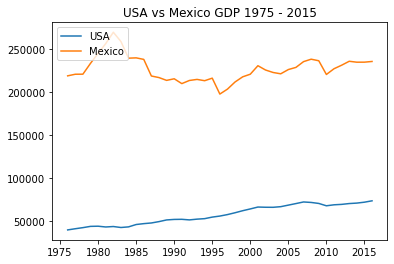

In [143]:
# plot time series of USA and Mexican GDPs
%matplotlib inline
import matplotlib.pyplot as plt
# related to datetime conversion (from matplotlib warning message)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.title("USA vs Mexico GDP 1975 - 2015")
usaline = plt.plot(usadata.index, usadata["USA"], label='USA')
mexline = plt.plot(mexdata.index, mexdata["Mexico"], label='Mexico')
plt.legend(loc='upper left')
plt.show() 

## Asia 

In [144]:
#Thailand
# access the data from Quandl using identifiers: date, series_id, value, country_code
quandl.ApiConfig.api_key = 'h2s8P6BqKFA4f-tKoRDL'
#get USA GDP data
data3 = quandl.get('PSE/AGDPRO992I_PALL_TH', start_date='1975-12-31', end_date= '2015-12-31', paginate=True)
#rename columns
thaidata = data3.rename(columns=({"Value": "Thailand"}))
#print(type(data))
#usadata.tail(15)
thaidata.head(5)

,Thailand
Date,
1975-12-31,77659.085938
1976-12-31,82186.523438
1977-12-31,87420.460938
1978-12-31,93443.617188
1979-12-31,95205.242188


In [145]:
#Singapore
# access the data from Quandl using identifiers: date, series_id, value, country_code
quandl.ApiConfig.api_key = 'h2s8P6BqKFA4f-tKoRDL'
#get USA GDP data
data4 = quandl.get('PSE/AGDPRO992I_PALL_SG', start_date='1975-12-31', end_date= '2015-12-31', paginate=True)
#rename columns
singdata = data4.rename(columns=({"Value": "Singapore"}))
#print(type(data))
#usadata.tail(15)
singdata.head(5)

,Singapore
Date,
1975-12-31,24582.257812
1976-12-31,25558.662109
1977-12-31,26547.927734
1978-12-31,27758.380859
1979-12-31,29235.173828


In [146]:
#Korea
# access the data from Quandl using identifiers: date, series_id, value, country_code
quandl.ApiConfig.api_key = 'h2s8P6BqKFA4f-tKoRDL'
#get USA GDP data
data5 = quandl.get('PSE/AGDPRO992I_PALL_KR', start_date='1975-12-31', end_date= '2015-12-31', paginate=True)
#rename columns
koreadata = data5.rename(columns=({"Value": "South Korea"}))
#print(type(data))
#usadata.tail(15)
koreadata.head(5)

,South Korea
Date,
1975-12-31,6663568.0
1976-12-31,7274402.0
1977-12-31,7889712.5
1978-12-31,8441103.0
1979-12-31,8851232.0


In [147]:
# join the 3 DataFrames
asia = pd.merge(pd.merge(thaidata,singdata,on='Date'),koreadata,on='Date')
asia.head(5)

,Thailand,Singapore,South Korea
Date,,,
1975-12-31,77659.085938,24582.257812,6663568.0
1976-12-31,82186.523438,25558.662109,7274402.0
1977-12-31,87420.460938,26547.927734,7889712.5
1978-12-31,93443.617188,27758.380859,8441103.0
1979-12-31,95205.242188,29235.173828,8851232.0


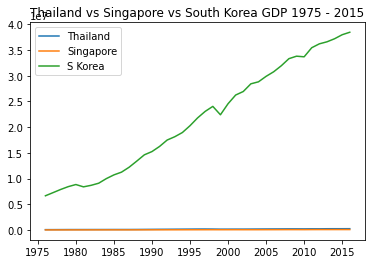

In [148]:
# plot time series of Thailand, Singapore and Korean GDPs
%matplotlib inline
import matplotlib.pyplot as plt
# related to datetime conversion (from matplotlib warning message)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.title("Thailand vs Singapore vs South Korea GDP 1975 - 2015")
thailine = plt.plot(thaidata.index, thaidata["Thailand"], label='Thailand')
singline = plt.plot(singdata.index, singdata["Singapore"], label='Singapore')
korealine = plt.plot(koreadata.index, koreadata["South Korea"], label='S Korea')
plt.legend(loc='upper left')
plt.show() 

## Africa

In [149]:
#Nigeria
# access the data from Quandl using identifiers: date, series_id, value, country_code
quandl.ApiConfig.api_key = 'h2s8P6BqKFA4f-tKoRDL'
#get USA GDP data
data6 = quandl.get('PSE/AGDPRO992I_PALL_NE', start_date='1975-12-31', end_date= '2015-12-31', paginate=True)
#rename columns
nigeriadata = data6.rename(columns=({"Value": "Nigeria"}))
#print(type(data))
#usadata.tail(15)
nigeriadata.head(5)

,Nigeria
Date,
1975-12-31,636905.1250
1976-12-31,618867.3125
1977-12-31,643721.8125
1978-12-31,706059.8125
1979-12-31,732594.7500


In [150]:
#South Africa
# access the data from Quandl using identifiers: date, series_id, value, country_code
quandl.ApiConfig.api_key = 'h2s8P6BqKFA4f-tKoRDL'
#get USA GDP data
data7 = quandl.get('PSE/AGDPRO992I_PALL_ZA', start_date='1975-12-31', end_date= '2015-12-31', paginate=True)
#rename columns
safricadata = data7.rename(columns=({"Value": "South Africa"}))
#print(type(data))
#usadata.tail(15)
safricadata.head(5)

,South Africa
Date,
1975-12-31,128776.390625
1976-12-31,125939.882812
1977-12-31,124178.664062
1978-12-31,125136.781250
1979-12-31,127820.843750


In [151]:
# join the two DataFrames
africa = nigeriadata.join(safricadata, how='outer')
africa.head(5)

,Nigeria,South Africa
Date,,
1975-12-31,636905.1250,128776.390625
1976-12-31,618867.3125,125939.882812
1977-12-31,643721.8125,124178.664062
1978-12-31,706059.8125,125136.781250
1979-12-31,732594.7500,127820.843750


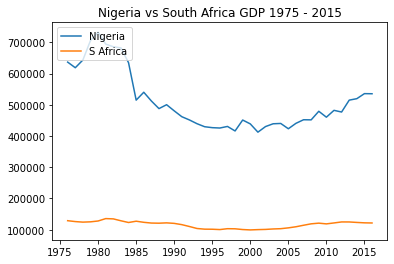

In [152]:
# plot time series of Nigeria and South African GDPs
%matplotlib inline
import matplotlib.pyplot as plt
# related to datetime conversion (from matplotlib warning message)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.title("Nigeria vs South Africa GDP 1975 - 2015")
nigerialine = plt.plot(nigeriadata.index, nigeriadata["Nigeria"], label='Nigeria')
safricaline = plt.plot(safricadata.index, safricadata["South Africa"], label='S Africa')
plt.legend(loc='upper left')
plt.show() 

## Europe

In [153]:
#Switzerland
# access the data from Quandl using identifiers: date, series_id, value, country_code
quandl.ApiConfig.api_key = 'h2s8P6BqKFA4f-tKoRDL'
#get USA GDP data
data8 = quandl.get('PSE/AGDPRO992I_PALL_CH', start_date='1975-12-31', end_date= '2015-12-31', paginate=True)
#rename columns
switzdata = data8.rename(columns=({"Value": "Switzerland"}))
switzdata.head(5)

,Switzerland
Date,
1975-12-31,74763.132812
1976-12-31,73832.195312
1977-12-31,74698.070312
1978-12-31,76772.031250
1979-12-31,77546.843750


In [154]:
#Poland
# access the data from Quandl using identifiers: date, series_id, value, country_code
quandl.ApiConfig.api_key = 'h2s8P6BqKFA4f-tKoRDL'
#get USA GDP data
data9 = quandl.get('PSE/AGDPRO992I_PALL_PL', start_date='1975-12-31', end_date= '2015-12-31', paginate=True)
#rename columns
poldata = data9.rename(columns=({"Value": "Poland"}))
poldata.head(5)

,Poland
Date,
1975-12-31,28339.857422
1976-12-31,30039.710938
1977-12-31,31584.173828
1978-12-31,32707.234375
1979-12-31,33426.679688


In [155]:
# join the two DataFrames
europe = switzdata.join(poldata, how='outer')
europe.head(5)

,Switzerland,Poland
Date,,
1975-12-31,74763.132812,28339.857422
1976-12-31,73832.195312,30039.710938
1977-12-31,74698.070312,31584.173828
1978-12-31,76772.031250,32707.234375
1979-12-31,77546.843750,33426.679688


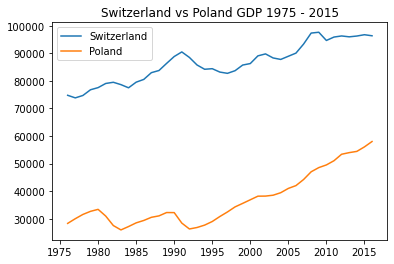

In [156]:
# plot time series of Switzerland and Poland GDPs
%matplotlib inline
import matplotlib.pyplot as plt
# related to datetime conversion (from matplotlib warning message)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.title("Switzerland vs Poland GDP 1975 - 2015")
switzline = plt.plot(switzdata.index, switzdata["Switzerland"], label='Switzerland')
polline = plt.plot(poldata.index, poldata["Poland"], label='Poland')
plt.legend(loc='upper left')
plt.show() 

## Middle East

In [157]:
#Syria
# access the data from Quandl using identifiers: date, series_id, value, country_code
quandl.ApiConfig.api_key = 'h2s8P6BqKFA4f-tKoRDL'
#get USA GDP data
data10 = quandl.get('PSE/AGDPRO992I_PALL_SY', start_date='1975-12-31', end_date= '2015-12-31', paginate=True)
#rename columns
syriadata = data10.rename(columns=({"Value": "Syria"}))
syriadata.head(5)

,Syria
Date,
1975-12-31,9.897795e+05
1976-12-31,1.064553e+06
1977-12-31,1.018966e+06
1978-12-31,1.074076e+06
1979-12-31,1.078563e+06


In [158]:
#Saudi Arabia
# access the data from Quandl using identifiers: date, series_id, value, country_code
quandl.ApiConfig.api_key = 'h2s8P6BqKFA4f-tKoRDL'
#get USA GDP data
data11 = quandl.get('PSE/AGDPRO992I_PALL_SA', start_date='1975-12-31', end_date= '2015-12-31', paginate=True)
#rename columns
saudidata = data11.rename(columns=({"Value": "Saudi Arabia"}))
saudidata.head(5)

,Saudi Arabia
Date,
1975-12-31,264392.21875
1976-12-31,294918.40625
1977-12-31,298260.00000
1978-12-31,266582.75000
1979-12-31,281033.81250


In [159]:
# join the two DataFrames
mideast = syriadata.join(saudidata, how='outer')
mideast.head(5)

,Syria,Saudi Arabia
Date,,
1975-12-31,9.897795e+05,264392.21875
1976-12-31,1.064553e+06,294918.40625
1977-12-31,1.018966e+06,298260.00000
1978-12-31,1.074076e+06,266582.75000
1979-12-31,1.078563e+06,281033.81250


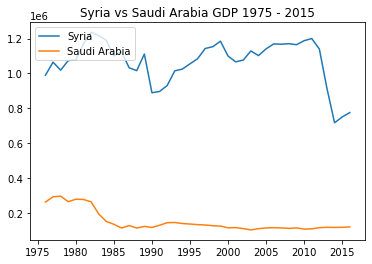

In [160]:
# plot time series of Syria and Saudi Arabia GDPs
%matplotlib inline
import matplotlib.pyplot as plt
# related to datetime conversion (from matplotlib warning message)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.title("Syria vs Saudi Arabia GDP 1975 - 2015")
syrialine = plt.plot(syriadata.index, syriadata["Syria"], label='Syria')
saudiline = plt.plot(saudidata.index, saudidata["Saudi Arabia"], label='Saudi Arabia')
plt.legend(loc='upper left')
plt.show() 

## South America

In [161]:
#Peru
# access the data from Quandl using identifiers: date, series_id, value, country_code
quandl.ApiConfig.api_key = 'h2s8P6BqKFA4f-tKoRDL'
#get USA GDP data
data12 = quandl.get('PSE/AGDPRO992I_PALL_PE', start_date='1975-12-31', end_date= '2015-12-31', paginate=True)
#rename columns
perudata = data12.rename(columns=({"Value": "Peru"}))
perudata.head(5)

,Peru
Date,
1975-12-31,27659.496094
1976-12-31,27263.427734
1977-12-31,26583.968750
1978-12-31,25140.849609
1979-12-31,25396.076172


In [162]:
#Nicaragua
# access the data from Quandl using identifiers: date, series_id, value, country_code
quandl.ApiConfig.api_key = 'h2s8P6BqKFA4f-tKoRDL'
#get USA GDP data
data13 = quandl.get('PSE/AGDPRO992I_PALL_NI', start_date='1975-12-31', end_date= '2015-12-31', paginate=True)
#rename columns
nicdata = data13.rename(columns=({"Value": "Nicaragua"}))
nicdata.head(5)

,Nicaragua
Date,
1975-12-31,172459.34375
1976-12-31,172774.81250
1977-12-31,176310.68750
1978-12-31,168655.06250
1979-12-31,133405.21875


In [163]:
# join the two DataFrames
samerica = perudata.join(nicdata, how='outer')
samerica.head(5)

,Peru,Nicaragua
Date,,
1975-12-31,27659.496094,172459.34375
1976-12-31,27263.427734,172774.81250
1977-12-31,26583.968750,176310.68750
1978-12-31,25140.849609,168655.06250
1979-12-31,25396.076172,133405.21875


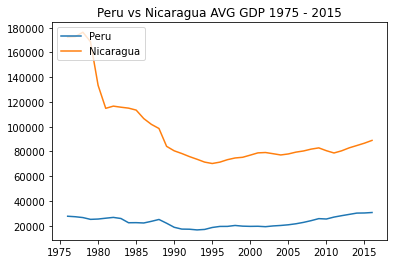

In [164]:
# plot time series of Syria and Saudi Arabia GDPs
%matplotlib inline
import matplotlib.pyplot as plt
# related to datetime conversion (from matplotlib warning message)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.title("Peru vs Nicaragua AVG GDP 1975 - 2015")
peruline = plt.plot(perudata.index, perudata["Peru"], label='Peru')
nicline = plt.plot(nicdata.index, nicdata["Nicaragua"], label='Nicaragua')
plt.legend(loc='upper left')
plt.show() 

## Oceania

In [165]:
#New Zealand
# access the data from Quandl using identifiers: date, series_id, value, country_code
quandl.ApiConfig.api_key = 'h2s8P6BqKFA4f-tKoRDL'
#get USA GDP data
data14 = quandl.get('PSE/AGDPRO992I_PALL_NZ', start_date='1975-12-31', end_date= '2015-12-31', paginate=True)
#rename columns
oceania = data14.rename(columns=({"Value": "New Zealand"}))
oceania.head(5)

,New Zealand
Date,
1975-12-31,52238.738281
1976-12-31,53038.667969
1977-12-31,51687.484375
1978-12-31,52731.718750
1979-12-31,51518.742188


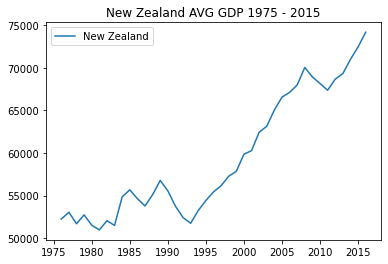

In [166]:
# plot time series of Syria and Saudi Arabia GDPs
%matplotlib inline
import matplotlib.pyplot as plt
# related to datetime conversion (from matplotlib warning message)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.title("New Zealand AVG GDP 1975 - 2015")
nzline = plt.plot(oceania.index, nzdata["New Zealand AVG GDP"], label='New Zealand')
#nicline = plt.plot(nicdata.index, nicdata["Nicaragua AVG GDP"], label='Nicaragua')
plt.legend(loc='upper left')
plt.show() 

## Merging all Region Dataframes

In [167]:
frames = [northamerica, asia, africa, europe, mideast, samerica, oceania]

#result = pd.concat(frames, keys=["north america", "asia", "africa", "europe", "mideast", "south america", "oceania"])
result = pd.concat(frames, axis=1, join="inner")
result.head()

,USA,Mexico,Thailand,Singapore,South Korea,Nigeria,South Africa,Switzerland,Poland,Syria,Saudi Arabia,Peru,Nicaragua,New Zealand
Date,,,,,,,,,,,,,,
1975-12-31,39597.394531,218578.125000,77659.085938,24582.257812,6663568.0,636905.1250,128776.390625,74763.132812,28339.857422,9.897795e+05,264392.21875,27659.496094,172459.34375,52238.738281
1976-12-31,40971.128906,220435.265625,82186.523438,25558.662109,7274402.0,618867.3125,125939.882812,73832.195312,30039.710938,1.064553e+06,294918.40625,27263.427734,172774.81250,53038.667969
1977-12-31,42240.898438,220498.421875,87420.460938,26547.927734,7889712.5,643721.8125,124178.664062,74698.070312,31584.173828,1.018966e+06,298260.00000,26583.968750,176310.68750,51687.484375
1978-12-31,43717.968750,233083.812500,93443.617188,27758.380859,8441103.0,706059.8125,125136.781250,76772.031250,32707.234375,1.074076e+06,266582.75000,25140.849609,168655.06250,52731.718750
1979-12-31,43910.128906,244788.875000,95205.242188,29235.173828,8851232.0,732594.7500,127820.843750,77546.843750,33426.679688,1.078563e+06,281033.81250,25396.076172,133405.21875,51518.742188


### Finding Statistical Relations Bw Data

#### B) Get a simple statistic review of the returns: mean, stddev

In [168]:
# map ETFs to sectors and calculate percentage returns (%)
#ETF_raw = ETF_raw.rename(columns = ETF_dict)
#pd.set_option('precision', 2)
gdpchange = result.pct_change() * 100
gdpchange = gdpchange.iloc[1:]
gdpchange.head(10)

,USA,Mexico,Thailand,Singapore,South Korea,Nigeria,South Africa,Switzerland,Poland,Syria,Saudi Arabia,Peru,Nicaragua,New Zealand
Date,,,,,,,,,,,,,,
1976-12-31,3.469254,0.849646,5.829888,3.971988,9.166771,-2.832104,-2.202661,-1.245183,5.998102,7.554561,11.545796,-1.431944,0.182924,1.531296
1977-12-31,3.099181,0.028651,6.368365,3.870569,8.458572,4.016127,-1.398460,1.172761,5.141404,-4.282284,1.133057,-2.492199,2.046522,-2.547544
1978-12-31,3.496778,5.707701,6.889870,4.559501,6.988727,9.683997,0.771563,2.776459,3.555770,5.408468,-10.620683,-5.428532,-4.342122,2.020285
1979-12-31,0.439545,5.021826,1.885228,5.320170,4.858713,3.758171,2.144903,1.009238,2.199652,0.417754,5.420854,1.015187,-20.900555,-2.300279
1980-12-31,-2.057558,4.585271,1.321331,5.989835,-5.090998,-5.186855,6.005500,1.941437,-7.291331,8.412140,-0.609357,2.690261,-13.915908,-1.079719
1981-12-31,1.232794,5.158201,2.223241,5.952565,3.506279,-1.217128,-0.672339,0.546701,-11.076698,5.689066,-4.754191,2.468186,1.552150,2.128511
1982-12-31,-2.586217,-4.009791,1.758655,2.754690,4.729410,-0.527096,-4.516102,-1.074059,-5.738214,-1.533906,-26.074693,-3.318107,-0.750769,-1.075008
1983-12-31,1.694270,-7.472461,2.006412,4.352502,9.784948,-6.960822,-4.291595,-1.462620,4.693994,-2.244775,-21.702811,-13.276696,-0.642083,6.519304
1984-12-31,6.359138,0.143872,2.132935,4.541374,7.288798,-18.881685,3.381994,2.634908,4.924345,-7.539395,-10.870948,0.298433,-1.380640,1.504456


In [169]:
# Extract the mean & standard deviation of GDPs for countries
gdp_stats = gdpchange.describe()
gdp_stats_raw = gdp_stats[(gdp_stats.index == 'mean') | (gdp_stats.index == 'std')].T
gdp_stats_raw.sort_values(by = ['mean'], inplace = True)
gdp_stats_sorted = gdp_stats_raw
gdp_stats_sorted.T.round(2)

,Saudi Arabia,Nicaragua,Syria,Nigeria,South Africa,Mexico,Peru,Switzerland,New Zealand,USA,Poland,Thailand,Singapore,South Korea
mean,-1.56,-1.51,-0.33,-0.30,-0.11,0.24,0.41,0.65,0.90,1.57,1.91,3.16,3.43,4.54
std,8.18,5.03,7.17,5.14,2.70,3.48,5.36,1.83,2.16,2.05,4.43,3.64,3.72,3.66


In [170]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Countries')

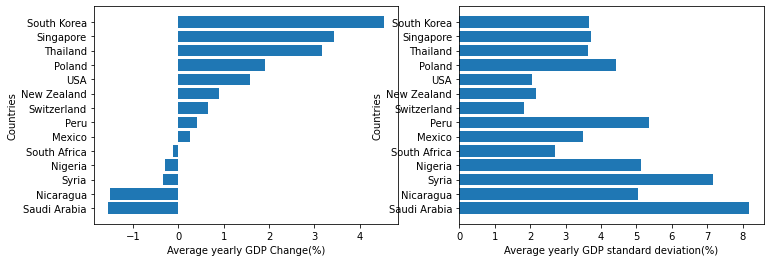

In [171]:
# bar chart of the mean & stddev of ETFs
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.barh(gdp_stats_sorted.index, gdp_stats_sorted['mean'].values)
ax1.set_xlabel('Average yearly GDP Change(%)')
ax1.set_ylabel('Countries')
ax2.barh(gdp_stats_sorted.index, gdp_stats_sorted['std'].values)
ax2.set_xlabel('Average yearly GDP standard deviation(%)')
ax2.set_ylabel('Countries')